<a href="https://colab.research.google.com/github/LandonAmickUNCC/ECGR4105/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Landon Amick 801293791 Homework 2 https://github.com/LandonAmickUNCC/ECGR4105

In [1919]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Setting and Checking data**

In [1920]:
# Use the URL for the raw CSV data -- more datasets can be find here: https://github.com/satishgunjal/datasets
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/Housing.csv'

df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [1921]:
# Define the proportion of data to be used for the training set
train_proportion = 0.8

# Create a random mask for splitting the data
# This will generate a boolean array where each element is True with probability `train_proportion`
train_mask = np.random.rand(len(df)) < train_proportion

# Split the DataFrame into training and validation sets based on the mask
train_df = df[train_mask]
validation_df = df[~train_mask]

# Display the shapes of the resulting DataFrames to verify the split
print(train_df.head())
print(validation_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
9   9800000  5750   

In [1922]:
area = train_df.values[:, 1]
bedrooms = train_df.values[:, 2]
bathrooms = train_df.values[:, 3]
stories = train_df.values[:, 4]
mainroad = train_df.values[:, 5]
guestroom = train_df.values[:, 6]
basement = train_df.values[:, 7]
hotwater = train_df.values[:, 8]
aircon = train_df.values[:, 9]
parking = train_df.values[:, 10]
prefarea = train_df.values[:, 11]
frunished = train_df.values[:, 12]
Y = train_df.values[:, 0]
m = len(Y)
n = len(area)

print('area = ', area[: 5])
print('bedrooms = ', bedrooms[: 5])
print('bathrooms = ', bathrooms[: 5])
print('stories = ', stories[: 5])
print('mainroad = ', mainroad[: 5])
print('Y = ', Y[: 5])
print('m = ', m)
print('n = ', n)

area =  [7420 8960 9960 7500 7420]
bedrooms =  [4 4 3 4 4]
bathrooms =  [2 4 2 2 1]
stories =  [3 4 2 2 2]
mainroad =  ['yes' 'yes' 'yes' 'yes' 'yes']
Y =  [13300000 12250000 12250000 12215000 11410000]
m =  429
n =  429


**1A**


In [1923]:
# Use the actual column names from the DataFrame
X1A = train_df[['area','bedrooms','bathrooms','stories','parking']].values
Y1A = train_df[['price']].values

X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X1A))

X1A_val = validation_df[['area','bedrooms','bathrooms','stories','parking']].values
Y1A_val = validation_df['price'].values

m_val = len(Y1A_val) # Number of validation examples

# Add a column of ones for the intercept term to the validation features
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X1A_val))

print(X_multi[:5])
print(X_multi_val[:5])

[[1.00e+00 7.42e+03 4.00e+00 2.00e+00 3.00e+00 2.00e+00]
 [1.00e+00 8.96e+03 4.00e+00 4.00e+00 4.00e+00 3.00e+00]
 [1.00e+00 9.96e+03 3.00e+00 2.00e+00 2.00e+00 2.00e+00]
 [1.00e+00 7.50e+03 4.00e+00 2.00e+00 2.00e+00 3.00e+00]
 [1.00e+00 7.42e+03 4.00e+00 1.00e+00 2.00e+00 2.00e+00]]
[[1.00e+00 5.75e+03 3.00e+00 2.00e+00 4.00e+00 1.00e+00]
 [1.00e+00 8.50e+03 3.00e+00 2.00e+00 4.00e+00 2.00e+00]
 [1.00e+00 5.50e+03 4.00e+00 2.00e+00 2.00e+00 1.00e+00]
 [1.00e+00 6.84e+03 5.00e+00 1.00e+00 2.00e+00 1.00e+00]
 [1.00e+00 6.55e+03 3.00e+00 1.00e+00 2.00e+00 0.00e+00]]


In [1924]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [1925]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 9000
alpha = 0.00000000001

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history1A = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y1A_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [1.64593081e-01 8.19673942e+02 5.21369077e-01 2.49192746e-01
 3.56212905e-01 1.45345556e-01]


In [1926]:
# Calculate the cost on the validation set using the optimal theta values from training
cost_validation1A = compute_cost_multi(X_multi_val, Y1A_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation1A:.4f}")

Cost on the validation set: 1470036975883.7505


Final optimal theta values for multiple linear regression: [1.64593081e-01 8.19673942e+02 5.21369077e-01 2.49192746e-01
 3.56212905e-01 1.45345556e-01]
Final training cost for multiple linear regression: 1754122991490.1628
Final validation cost for multiple linear regression: 1470036975883.7505


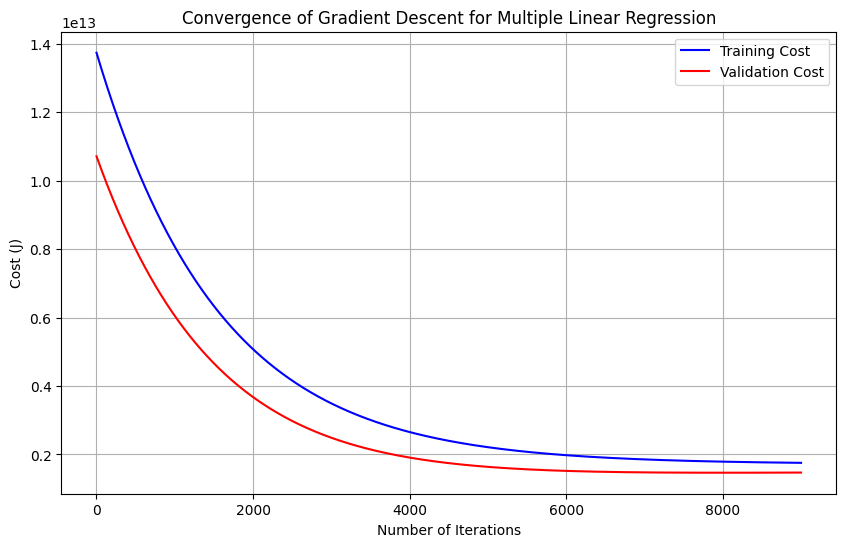

The final training cost value is approximately 1754122991490.1628.
The final validation cost value is approximately 1470036975883.7505.


In [1927]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history1A[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history1A, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history1A[-1]:.4f}.")

It seems the area parameter is the highest weighted parameter due to its scale.

**1B**







In [1928]:
# Convert 'yes' and 'no' values to 1 and 0 in the relevant columns of both dataframes
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_columns:
    # Create a copy of the slice before modifying it to avoid SettingWithCopyWarning
    train_df.loc[:, col] = train_df[col].replace({'yes': 1, 'no': 0})
    validation_df.loc[:, col] = validation_df[col].replace({'yes': 1, 'no': 0})

# Display the first 5 rows of the modified training DataFrame to verify the changes
print(train_df.head())
print(validation_df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3        1         0        0   
1  12250000  8960         4          4        4        1         0        0   
2  12250000  9960         3          2        2        1         0        1   
3  12215000  7500         4          2        2        1         0        1   
4  11410000  7420         4          1        2        1         1        1   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0               0               1        2        1        furnished  
1               0               1        3        0        furnished  
2               0               0        2        1   semi-furnished  
3               0               1        3        1        furnished  
4               0               1        2        0        furnished  
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
9   9800000  5750   

/tmp/ipython-input-471409677.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df.loc[:, col] = train_df[col].replace({'yes': 1, 'no': 0})
/tmp/ipython-input-471409677.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_df.loc[:, col] = validation_df[col].replace({'yes': 1, 'no': 0})


In [1929]:
# Use the actual column names from the DataFrame
X1B = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y1B = train_df[['price']].values

X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X1B))

X1B_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y1B_val = validation_df['price'].values

m_val = len(Y1B_val) # Number of validation examples

# Add a column of ones for the intercept term to the validation features
X_0_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0_val, X1B_val))

print(X_multi[:5])

[[1.0 7420 4 2 3 1 0 0 0 1 2 1]
 [1.0 8960 4 4 4 1 0 0 0 1 3 0]
 [1.0 9960 3 2 2 1 0 1 0 0 2 1]
 [1.0 7500 4 2 2 1 0 1 0 1 3 1]
 [1.0 7420 4 1 2 1 1 1 0 1 2 0]]


In [1930]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [1931]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 9000
alpha = 0.00000000001

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history1B = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y1B_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [1.64593076e-01 8.19673915e+02 5.21369061e-01 2.49192739e-01
 3.56212895e-01 1.47135621e-01 4.19849303e-02 6.96056468e-02
 1.15530040e-02 7.85124578e-02 1.45345552e-01 5.05313529e-02]


In [1932]:
# Calculate the cost on the validation set using the optimal theta values from training
cost_validation1B = compute_cost_multi(X_multi_val, Y1B_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation1B:.4f}")

Cost on the validation set: 1470036858193.4067


Final optimal theta values for multiple linear regression: [1.64593076e-01 8.19673915e+02 5.21369061e-01 2.49192739e-01
 3.56212895e-01 1.47135621e-01 4.19849303e-02 6.96056468e-02
 1.15530040e-02 7.85124578e-02 1.45345552e-01 5.05313529e-02]
Final training cost for multiple linear regression: 1754122881543.2437
Final validation cost for multiple linear regression: 1470036858193.4053


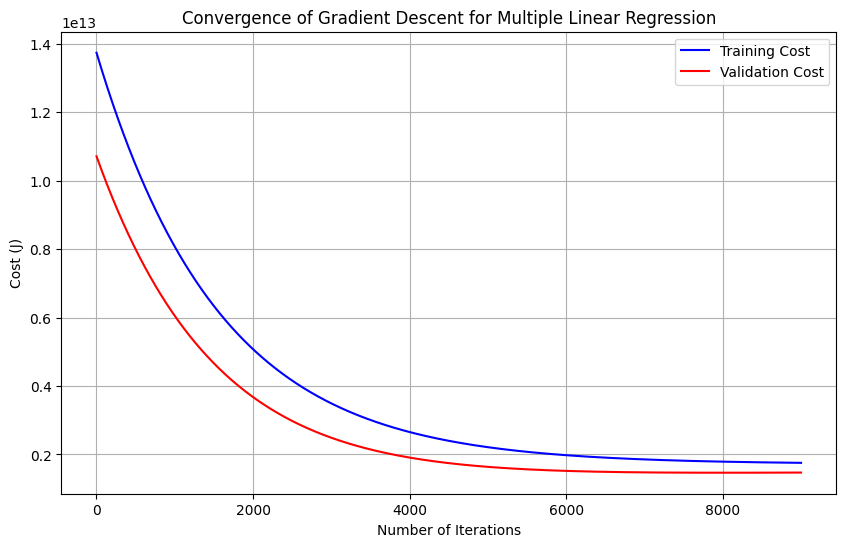

The final training cost value is approximately 1754122881543.2437.
The final validation cost value is approximately 1470036858193.4053.


In [1933]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history1B[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history1B, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history1B[-1]:.4f}.")

Similar to 1A the area is the strongest parameter due to its scaling. However the cost does get much lower here with the addition of the new parameters

**2A**

Standarization

In [1934]:
# Use the actual column names from the DataFrame
X2AS = train_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AS = train_df[['price']].values

# Standardize the features using mean and standard deviation from the training data
# Calculate mean and standard deviation from the training data
mean = X2AS.mean(axis=0)
std = X2AS.std(axis=0)

# Standardize the training features
X2A_standardized = (X2AS - mean) / std

# Add a column of ones for the intercept term to the standardized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2A_standardized))

print("Standardized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for standardization using the same mean and std from training
X2AS_val = validation_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AS_val = validation_df['price'].values

# Standardize the validation features using the mean and std from the training data
X2A_val_standardized = (X2AS_val - mean) / std

# Add a column of ones for the intercept term to the standardized validation features
m_val = len(Y2AS_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X2A_val_standardized))

print("\nStandardized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Standardized X_multi (first 5 rows):
[[ 1.          1.0250451   1.4059365   1.35531717  1.29769142  1.49005543]
 [ 1.          1.74391418  1.4059365   5.23152429  2.42008984  2.65441569]
 [ 1.          2.21071228  0.04749785  1.35531717  0.17529299  1.49005543]
 [ 1.          1.06238895  1.4059365   1.35531717  0.17529299  2.65441569]
 [ 1.          1.0250451   1.4059365  -0.58278639  0.17529299  1.49005543]]

Standardized X_multi_val (first 5 rows):
[[ 1.          0.24549228  0.04749785  1.35531717  2.42008984  0.32569518]
 [ 1.          1.52918705  0.04749785  1.35531717  2.42008984  1.49005543]
 [ 1.          0.12879275  1.4059365   1.35531717  0.17529299  0.32569518]
 [ 1.          0.7543022   2.76437515 -0.58278639  0.17529299  0.32569518]
 [ 1.          0.61893076  0.04749785 -0.58278639  0.17529299 -0.83866508]]


In [1935]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [1936]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 250
alpha = 0.01

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2AS = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2AS_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [4480694.60633591  673671.70619309  208237.52245264  572544.20696163
  399406.42481206  398845.29653203]


In [1937]:
cost_validation2AS = compute_cost_multi(X_multi_val, Y2AS_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2AS:.4f}")

Cost on the validation set: 605775202955.7942


Final optimal theta values for multiple linear regression: [4480694.60633591  673671.70619309  208237.52245264  572544.20696163
  399406.42481206  398845.29653203]
Final training cost for multiple linear regression: 897740893159.5221
Final validation cost for multiple linear regression: 605775202955.7942


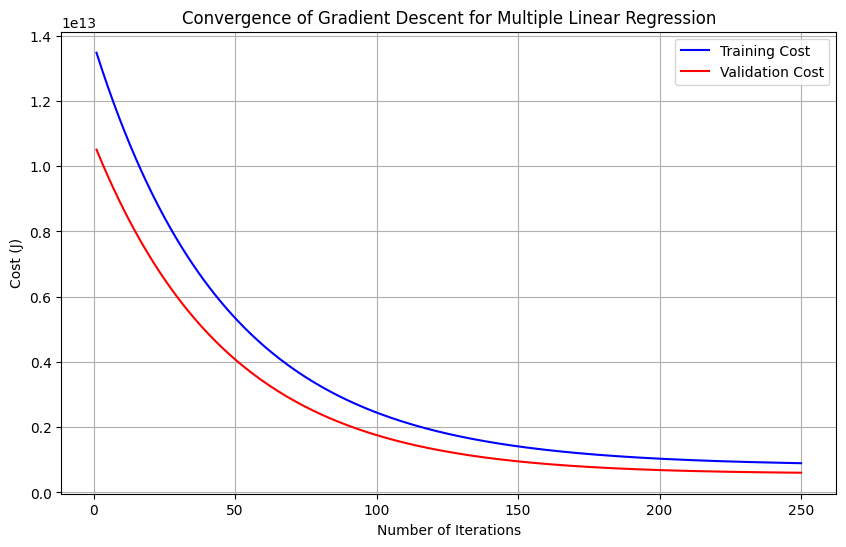

The final training cost value is approximately 897740893159.5221.
The final validation cost value is approximately 605775202955.7942.


In [1938]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2AS[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2AS, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2AS[-1]:.4f}.")

Normalization

In [1939]:
# Use the actual column names from the DataFrame
X2AN = train_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AN = train_df[['price']].values

# Normalize the features using min-max scaling from the training data
# Calculate min and max from the training data
min_vals = X2AN.min(axis=0)
max_vals = X2AN.max(axis=0)

# Apply normalization to the training features
# Add a small epsilon to avoid division by zero if max == min
epsilon = 1e-7
X2A_normalized = (X2AN - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2A_normalized))

print("Normalized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for normalization using the same min and max from training
X2AN_val = validation_df[['area','bedrooms','bathrooms','stories','parking']].values
Y2AN_val = validation_df['price'].values

# Apply normalization to the validation features using the min and max from the training data
X2A_val_normalized = (X2AN_val - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized validation features
m_val = len(Y2AN_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X2A_val_normalized))

print("\nNormalized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Normalized X_multi (first 5 rows):
[[1.         0.39656357 0.59999999 0.33333332 0.66666664 0.66666664]
 [1.         0.5024055  0.59999999 0.99999997 0.99999997 0.99999997]
 [1.         0.57113402 0.39999999 0.33333332 0.33333332 0.66666664]
 [1.         0.40206186 0.59999999 0.33333332 0.33333332 0.99999997]
 [1.         0.39656357 0.59999999 0.         0.33333332 0.66666664]]

Normalized X_multi_val (first 5 rows):
[[1.         0.28178694 0.39999999 0.33333332 0.99999997 0.33333332]
 [1.         0.47079038 0.39999999 0.33333332 0.99999997 0.66666664]
 [1.         0.26460481 0.59999999 0.33333332 0.33333332 0.33333332]
 [1.         0.35670103 0.79999998 0.         0.33333332 0.33333332]
 [1.         0.33676976 0.39999999 0.         0.33333332 0.        ]]


In [1940]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [1941]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 500
alpha = 0.01

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2AN = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2AN_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [3229520.69928976 1316797.46185147 1497345.72845169  886279.35646243
 1364736.102893   1315448.970591  ]


In [1942]:
cost_validation2AN = compute_cost_multi(X_multi_val, Y2AN_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2AN:.4f}")

Cost on the validation set: 762240604451.9115


Final optimal theta values for multiple linear regression: [3229520.69928976 1316797.46185147 1497345.72845169  886279.35646243
 1364736.102893   1315448.970591  ]
Final training cost for multiple linear regression: 1096047996182.9156
Final validation cost for multiple linear regression: 762240604451.9115


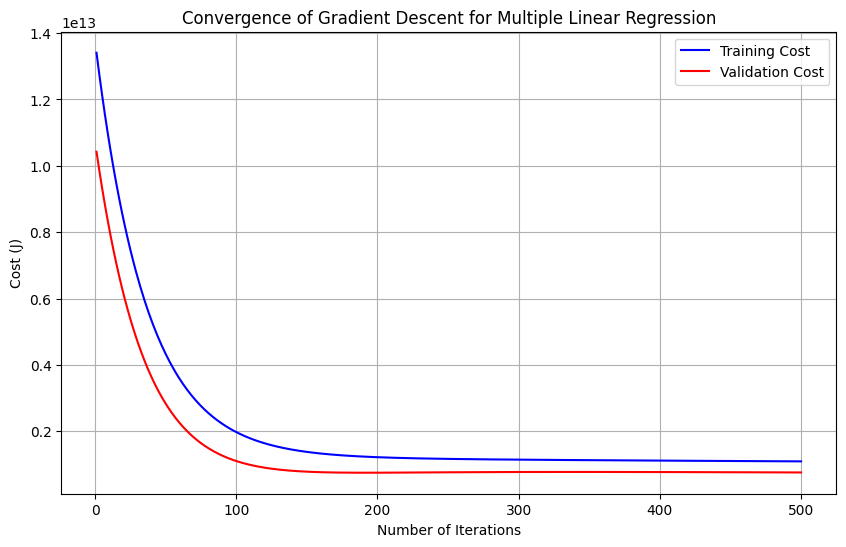

The final training cost value is approximately 1096047996182.9156.
The final validation cost value is approximately 762240604451.9115.


In [1943]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2AN[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2AN, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2AN[-1]:.4f}.")

The lowest training cost comes from the standardization method by a relatively small margin. This is better than normalization from a validation cost POV which is the right way too look at it from.

**2B**

Standardization

In [1944]:
# Use the actual column names from the DataFrame
X2BS = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BS = train_df[['price']].values

# Convert relevant columns to float before calculating mean and std
X2BS = X2BS.astype(np.float64)

# Standardize the features using mean and standard deviation from the training data
# Calculate mean and standard deviation from the training data
mean = X2BS.mean(axis=0)
std = X2BS.std(axis=0)

# Standardize the training features
X2B_standardized = (X2BS - mean) / std

# Add a column of ones for the intercept term to the standardized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2B_standardized))

print("Standardized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for standardization using the same mean and std from training
X2BS_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BS_val = validation_df['price'].values

# Convert relevant columns to float for validation data as well
X2BS_val = X2BS_val.astype(np.float64)


# Standardize the validation features using the mean and std from the training data
X2B_val_standardized = (X2BS_val - mean) / std

# Add a column of ones for the intercept term to the standardized validation features
m_val = len(Y2BS_val) # Number of validation examples
X_0B_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0B_val, X2B_val_standardized))

print("\nStandardized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Standardized X_multi (first 5 rows):
[[ 1.          1.0250451   1.4059365   1.35531717  1.29769142  0.41101987
  -0.48611854 -0.72948122 -0.21527067  1.43676223  1.49005543  1.77905833]
 [ 1.          1.74391418  1.4059365   5.23152429  2.42008984  0.41101987
  -0.48611854 -0.72948122 -0.21527067  1.43676223  2.65441569 -0.56209512]
 [ 1.          2.21071228  0.04749785  1.35531717  0.17529299  0.41101987
  -0.48611854  1.3708372  -0.21527067 -0.69600939  1.49005543  1.77905833]
 [ 1.          1.06238895  1.4059365   1.35531717  0.17529299  0.41101987
  -0.48611854  1.3708372  -0.21527067  1.43676223  2.65441569  1.77905833]
 [ 1.          1.0250451   1.4059365  -0.58278639  0.17529299  0.41101987
   2.0571114   1.3708372  -0.21527067  1.43676223  1.49005543 -0.56209512]]

Standardized X_multi_val (first 5 rows):
[[ 1.          0.24549228  0.04749785  1.35531717  2.42008984  0.41101987
   2.0571114  -0.72948122 -0.21527067  1.43676223  0.32569518  1.77905833]
 [ 1.          1.52918705 

In [1945]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [1946]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 500
alpha = 0.01

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2BS = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2BS_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [4843893.06250138  522280.19046099  123454.6687423   551429.0216582
  348652.15270102  191081.5854308   110004.23196013  187997.58386031
  176541.36304187  410436.81783771  300764.27347618  269953.85280323]


In [1947]:
cost_validation2BS = compute_cost_multi(X_multi_val, Y2BS_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2BS:.4f}")

Cost on the validation set: 401932271528.9518


Final optimal theta values for multiple linear regression: [4843893.06250138  522280.19046099  123454.6687423   551429.0216582
  348652.15270102  191081.5854308   110004.23196013  187997.58386031
  176541.36304187  410436.81783771  300764.27347618  269953.85280323]
Final training cost for multiple linear regression: 620340935027.5398
Final validation cost for multiple linear regression: 401932271528.9518


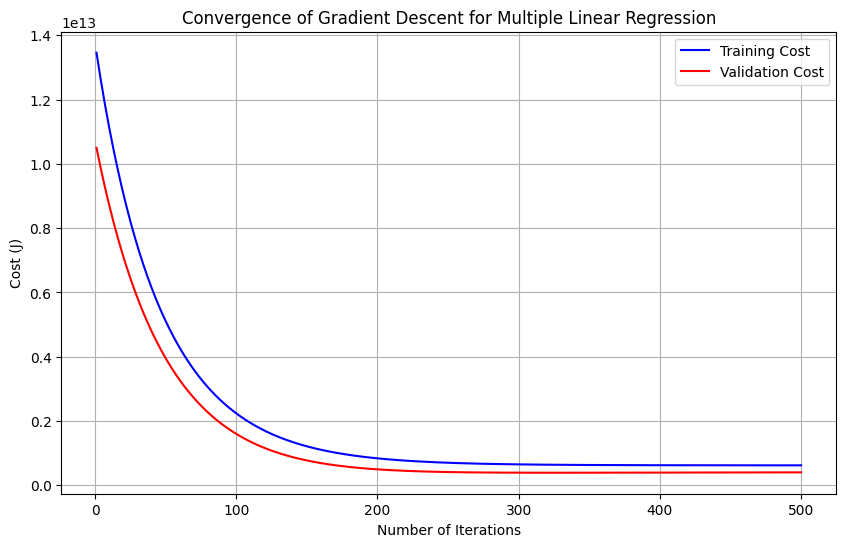

The final training cost value is approximately 620340935027.5398.
The final validation cost value is approximately 401932271528.9518.


In [1948]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2BS[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2BS, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2BS[-1]:.4f}.")

Normalization

In [1949]:
# Use the actual column names from the DataFrame
X2BN = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BN = train_df[['price']].values

# Normalize the features using min-max scaling from the training data
# Calculate min and max from the training data
min_vals = X2BN.min(axis=0)
max_vals = X2BN.max(axis=0)

# Apply normalization to the training features
# Add a small epsilon to avoid division by zero if max == min
epsilon = 1e-7
X2B_normalized = (X2BN - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X2B_normalized))

print("Normalized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for normalization using the same min and max from training
X2BN_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y2BN_val = validation_df['price'].values

# Apply normalization to the validation features using the min and max from the training data
X2B_val_normalized = (X2BN_val - min_vals) / (max_vals - min_vals + epsilon)

# Add a column of ones for the intercept term to the normalized validation features
m_val = len(Y2BN_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X2B_val_normalized))

print("\nNormalized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Normalized X_multi (first 5 rows):
[[1.0 0.39656357388043595 0.5999999880000002 0.3333333222222226
  0.6666666444444452 0.9999999000000099 0.0 0.0 0.0 0.9999999000000099
  0.6666666444444452 0.9999999000000099]
 [1.0 0.5024054982783339 0.5999999880000002 0.9999999666666678
  0.9999999666666678 0.9999999000000099 0.0 0.0 0.0 0.9999999000000099
  0.9999999666666678 0.0]
 [1.0 0.5711340206146314 0.39999999200000014 0.3333333222222226
  0.3333333222222226 0.9999999000000099 0.0 0.9999999000000099 0.0 0.0
  0.6666666444444452 0.9999999000000099]
 [1.0 0.40206185566733976 0.5999999880000002 0.3333333222222226
  0.3333333222222226 0.9999999000000099 0.0 0.9999999000000099 0.0
  0.9999999000000099 0.9999999666666678 0.9999999000000099]
 [1.0 0.39656357388043595 0.5999999880000002 0.0 0.3333333222222226
  0.9999999000000099 0.9999999000000099 0.9999999000000099 0.0
  0.9999999000000099 0.6666666444444452 0.0]]

Normalized X_multi_val (first 5 rows):
[[1.0 0.28178694157881934 0.39999999200000014

In [1950]:
def compute_cost_multi(X_multi, y, theta):
    """
    Compute cost for linear regression with multiple features.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient
        gradient = (1 / m) * X_multi.transpose().dot(errors)


        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta)


    return theta, train_cost_history, validation_cost_history

In [1951]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 2000
alpha = 0.001

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history2BN = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y2BN_val)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [1869360.3023519   629968.47611433  858548.41214443  431860.93532209
  778167.20065153 1561413.57603362  406227.10615036  646823.85939441
  168043.46265938  890202.05374571  665321.01006724  608640.40199082]


In [1952]:
cost_validation2BN = compute_cost_multi(X_multi_val, Y2BS_val, theta_optimal_multi)

print(f"Cost on the validation set: {cost_validation2BN:.4f}")

Cost on the validation set: 624428761186.3468


Final optimal theta values for multiple linear regression: [1869360.3023519   629968.47611433  858548.41214443  431860.93532209
  778167.20065153 1561413.57603362  406227.10615036  646823.85939441
  168043.46265938  890202.05374571  665321.01006724  608640.40199082]
Final training cost for multiple linear regression: 951284860375.4658
Final validation cost for multiple linear regression: 624428761186.3464


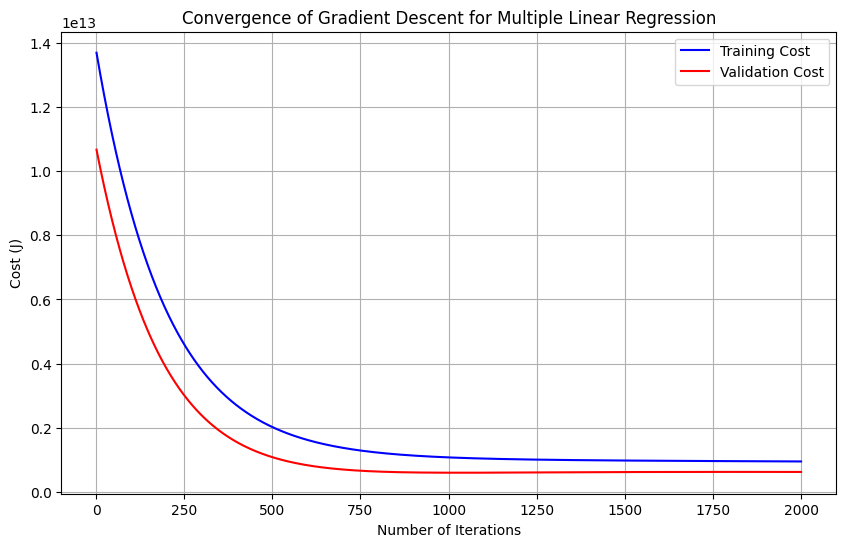

The final training cost value is approximately 951284860375.4658.
The final validation cost value is approximately 624428761186.3464.


In [1953]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history2BN[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history2BN, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history2BN[-1]:.4f}.")

Again like 2A the standardization seems to help the most. While the values are still insanely high the standardization is pulling down the training cost and validation cost more than the normalization approach.

**3A**

In [1954]:
X3AN = train_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
Y3AN = train_df[['price']].values

# Convert to float
X3AN = X3AN.astype(np.float64)

# Normalize the features using min and max values from the training data
# Calculate min and max from the training data
min_vals = X3AN.min(axis=0)
max_vals = X3AN.max(axis=0)
range_vals = max_vals - min_vals

# Normalize the training features
X3A_normalized = (X3AN - min_vals) / range_vals

# Add a column of ones for the intercept term to the normalized training features
m = len(Y3AN)
X_0 = np.ones((m, 1))
X_multi = np.hstack((X_0, X3A_normalized))

print("Normalized X_multi (first 5 rows):")
print(X_multi[:5])

# --- Prepare Validation Data ---
# Select feature columns for validation
X3AN_val = validation_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
Y3AN_val = validation_df['price'].values

# Convert to float
X3AN_val = X3AN_val.astype(np.float64)

# Normalize the validation features using the min and max from the *training data*
X3A_val_normalized = (X3AN_val - min_vals) / range_vals

# Add a column of ones for the intercept term to the normalized validation features
m_val = len(Y3AN_val)
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X3A_val_normalized))

print("\nNormalized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Normalized X_multi (first 5 rows):
[[1.         0.39656357 0.6        0.33333333 0.66666667 0.66666667]
 [1.         0.5024055  0.6        1.         1.         1.        ]
 [1.         0.57113402 0.4        0.33333333 0.33333333 0.66666667]
 [1.         0.40206186 0.6        0.33333333 0.33333333 1.        ]
 [1.         0.39656357 0.6        0.         0.33333333 0.66666667]]

Normalized X_multi_val (first 5 rows):
[[1.         0.28178694 0.4        0.33333333 1.         0.33333333]
 [1.         0.47079038 0.4        0.33333333 1.         0.66666667]
 [1.         0.26460481 0.6        0.33333333 0.33333333 0.33333333]
 [1.         0.35670103 0.8        0.         0.33333333 0.33333333]
 [1.         0.33676976 0.4        0.         0.33333333 0.        ]]


In [1955]:
def compute_cost_multi(X_multi, y, theta, lambda_param=0):
    """
    Compute cost for linear regression with multiple features and optional L2 regularization.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    J : Scalar value, the cost with L2 regularization
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    # Add L2 regularization term, excluding the bias term (theta[0])
    regularization_term = (lambda_param / (2 * m)) * np.sum(np.square(theta[1:]))
    J = 1 / (2 * m) * np.sum(sqrErrors) + regularization_term
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val, lambda_param=0):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features and optional L2 regularization.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient with regularization, excluding the bias term (theta[0])
        gradient = (1 / m) * X_multi.transpose().dot(errors)
        gradient[1:] += (lambda_param / m) * theta[1:] # Apply regularization to all but the bias term

        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta, lambda_param)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta, lambda_param)


    return theta, train_cost_history, validation_cost_history

In [1956]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 200
alpha = 0.02
lambda_param = 10

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history3AS = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y3AN_val, lambda_param)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [3340258.17698928 1175276.49364204 1407310.13128803  760687.93772455
 1259514.67083205 1192726.34098591]


In [1957]:
cost_validation3AN = compute_cost_multi(X_multi_val, Y3AN_val, theta_optimal_multi, lambda_param)

print(f"Cost on the validation set: {cost_validation3AN:.4f}")

Cost on the validation set: 1081222901335.6624


Final optimal theta values for multiple linear regression: [3340258.17698928 1175276.49364204 1407310.13128803  760687.93772455
 1259514.67083205 1192726.34098591]
Final training cost for multiple linear regression: 1220454495224.646
Final validation cost for multiple linear regression: 1081222901335.6624


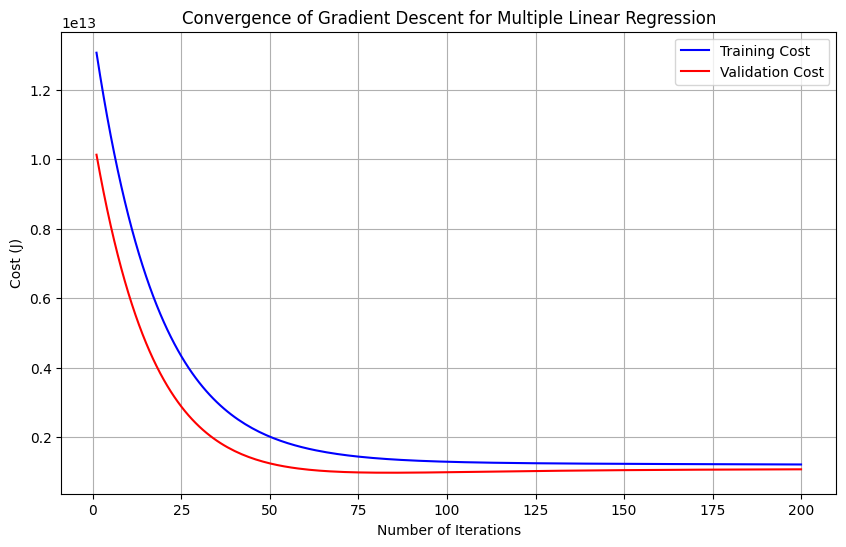

The final training cost value is approximately 1220454495224.6460.
The final validation cost value is approximately 1081222901335.6624.


In [1958]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history3AS[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history3AS, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history3AS[-1]:.4f}.")

This is much much better than 2A or 2B standardization pulling the validation cost much lower than before.

3B

In [1959]:
# Use the actual column names from the DataFrame
X3BS = train_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y3BS = train_df[['price']].values

# Convert to float before calculating mean and std
X3BS = X3BS.astype(np.float64)

# Standardize the features using mean and standard deviation from the training data
# Calculate mean and standard deviation from the training data
mean = X3BS.mean(axis=0)
std = X3BS.std(axis=0)

# Standardize the training features
X3B_standardized = (X3BS - mean) / std

# Add a column of ones for the intercept term to the standardized training features
X_0 = np.ones((m,1))
X_multi = np.hstack((X_0,X3B_standardized))

print("Standardized X_multi (first 5 rows):")
print(X_multi[:5])

# Prepare validation data for standardization using the same mean and std from training
X3BS_val = validation_df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
Y3BS_val = validation_df['price'].values

# Convert to float for validation data as well
X3BS_val = X3BS_val.astype(np.float64)

# Standardize the validation features using the mean and std from the training data
X3B_val_standardized = (X3BS_val - mean) / std

# Add a column of ones for the intercept term to the standardized validation features
m_val = len(Y3BS_val) # Number of validation examples
X_0A_val = np.ones((m_val, 1))
X_multi_val = np.hstack((X_0A_val, X3B_val_standardized))

print("\nStandardized X_multi_val (first 5 rows):")
print(X_multi_val[:5])

Standardized X_multi (first 5 rows):
[[ 1.          1.0250451   1.4059365   1.35531717  1.29769142  0.41101987
  -0.48611854 -0.72948122 -0.21527067  1.43676223  1.49005543  1.77905833]
 [ 1.          1.74391418  1.4059365   5.23152429  2.42008984  0.41101987
  -0.48611854 -0.72948122 -0.21527067  1.43676223  2.65441569 -0.56209512]
 [ 1.          2.21071228  0.04749785  1.35531717  0.17529299  0.41101987
  -0.48611854  1.3708372  -0.21527067 -0.69600939  1.49005543  1.77905833]
 [ 1.          1.06238895  1.4059365   1.35531717  0.17529299  0.41101987
  -0.48611854  1.3708372  -0.21527067  1.43676223  2.65441569  1.77905833]
 [ 1.          1.0250451   1.4059365  -0.58278639  0.17529299  0.41101987
   2.0571114   1.3708372  -0.21527067  1.43676223  1.49005543 -0.56209512]]

Standardized X_multi_val (first 5 rows):
[[ 1.          0.24549228  0.04749785  1.35531717  2.42008984  0.41101987
   2.0571114  -0.72948122 -0.21527067  1.43676223  0.32569518  1.77905833]
 [ 1.          1.52918705 

In [1960]:
def compute_cost_multi(X_multi, y, theta, lambda_param=0):
    """
    Compute cost for linear regression with multiple features and optional L2 regularization.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    J : Scalar value, the cost with L2 regularization
    """
    m = len(y)
    predictions = X_multi.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    # Add L2 regularization term, excluding the bias term (theta[0])
    regularization_term = (lambda_param / (2 * m)) * np.sum(np.square(theta[1:]))
    J = 1 / (2 * m) * np.sum(sqrErrors) + regularization_term
    return J

def gradient_descent_multi(X_multi, y, theta, alpha, iterations, X_val, y_val, lambda_param=0):
    """
    Compute the optimal parameters using gradient descent for linear regression with multiple features and optional L2 regularization.
    Also computes and stores the cost on a validation set at each iteration.

    Parameters:
    X_multi : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)
    X_val : 2D array of validation features (including X_0 column of ones)
    y_val : 1D array of validation labels/target values
    lambda_param : Regularization parameter (scalar), default is 0 for no regularization

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    train_cost_history : Array containing the training cost for each iteration. Dimension (iterations)
    validation_cost_history : Array containing the validation cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    validation_cost_history = np.zeros(iterations)


    # Explicitly cast X_multi and y to float64 to ensure numerical operations work
    X_multi = X_multi.astype(np.float64)
    y = y.astype(np.float64)
    X_val = X_val.astype(np.float64)
    y_val = y_val.astype(np.float64)


    for i in range(iterations):
        predictions = X_multi.dot(theta)
        errors = np.subtract(predictions, y)
        # Calculate gradient with regularization, excluding the bias term (theta[0])
        gradient = (1 / m) * X_multi.transpose().dot(errors)
        gradient[1:] += (lambda_param / m) * theta[1:] # Apply regularization to all but the bias term

        theta -= alpha * gradient
        train_cost_history[i] = compute_cost_multi(X_multi, y, theta, lambda_param)
        validation_cost_history[i] = compute_cost_multi(X_val, y_val, theta, lambda_param)


    return theta, train_cost_history, validation_cost_history

In [1961]:
# Initialize theta parameters with zeros. The size is the number of features in X_multi (including the bias term).
theta = np.zeros(X_multi.shape[1])

# Define the number of iterations and the learning rate.
iterations = 500
alpha = 0.01
lambda_param = 10

# Run the gradient descent algorithm.
theta_optimal_multi, train_cost_history_multi, validation_cost_history3BN = gradient_descent_multi(X_multi, Y, theta, alpha, iterations, X_multi_val, Y3BS_val, lambda_param)

# Print the final optimal theta values.
print('Optimal theta values:', theta_optimal_multi)

Optimal theta values: [4843893.06250138  514600.75827002  128210.02145512  542515.36014028
  344047.32234204  190876.12618425  111319.0485897   184688.57915955
  172595.85278576  404783.93623312  298920.06531209  267591.26613942]


In [1962]:
cost_validation3BN = compute_cost_multi(X_multi_val, Y3BS_val, theta_optimal_multi, lambda_param)

print(f"Cost on the validation set: {cost_validation3BN:.4f}")

Cost on the validation set: 449083020758.5905


Final optimal theta values for multiple linear regression: [4843893.06250138  514600.75827002  128210.02145512  542515.36014028
  344047.32234204  190876.12618425  111319.0485897   184688.57915955
  172595.85278576  404783.93623312  298920.06531209  267591.26613942]
Final training cost for multiple linear regression: 633852018780.9004
Final validation cost for multiple linear regression: 449083020758.59045


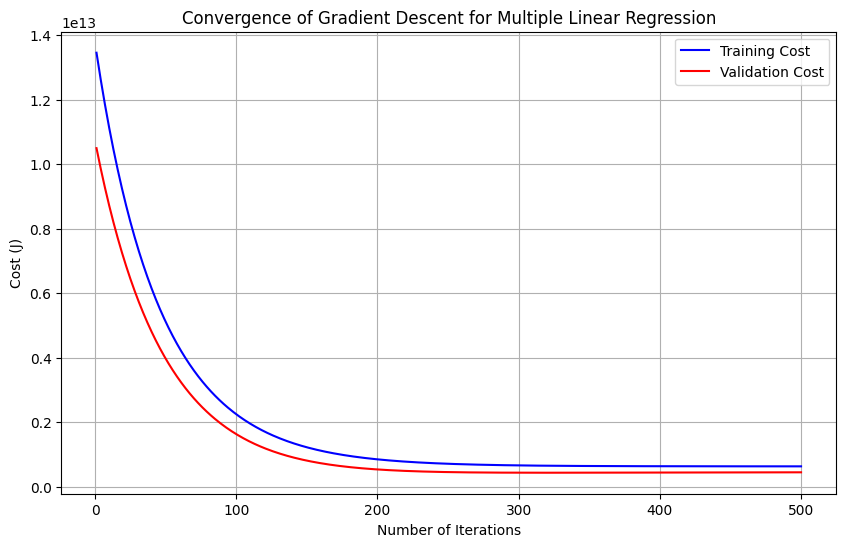

The final training cost value is approximately 633852018780.9004.
The final validation cost value is approximately 449083020758.5905.


In [1963]:
print('Final optimal theta values for multiple linear regression:', theta_optimal_multi)
print('Final training cost for multiple linear regression:', train_cost_history_multi[-1])
print('Final validation cost for multiple linear regression:', validation_cost_history3BN[-1])


plt.plot(range(1, iterations + 1), train_cost_history_multi, color='blue', label='Training Cost')
plt.plot(range(1, iterations + 1), validation_cost_history3BN, color='red', linestyle='-', label='Validation Cost')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent for Multiple Linear Regression')
plt.legend()
plt.show()

print(f"The final training cost value is approximately {train_cost_history_multi[-1]:.4f}.")
print(f"The final validation cost value is approximately {validation_cost_history3BN[-1]:.4f}.")

It seems like the using the less categories actually helps more as the extra categories makes the validation cost bump up around the 75 iteration mark.